# Working with Data

Seho Jeong, Sogang University; Aug 2025.

References
- **Coleman, Chase, Spencer Lyon, and Jesse Perla. n.d.** "DataFrames and Series in Pandas." QuantEcon DataScience, QuantEcon. https://datascience.quantecon.org/pandas/index.html.
- **Jung, Juergen. n.d.** "Computational Economics." Towson University.

## Introduction

This note covers data ingestion, cleaning, manipulation, analysis, and some visualization in Python. At the end of the note, you will be able to: (1) access data stored in a variety of formats, (2) combine multiple datasets based on observations that link them together, (3) perform custom operations on tables of data, (4) use the spilt-apply-combine method for analyzing subgroups of data, (5) automate static analysis on changing data, and (6) produce publication quality visualizations. The expression "practice makes perfect" is especially true here. As you work with these tools, both the time to write and the time to run your programs will fall dramatically.

In this note I use **pandas** to work with data, a python library for data analysis and manipulation. Economists often work with datasets with complex structures, such as panels. Common tasks include (1) importing data, cleaning it and reshaping it across several axes, (2) selecting a time series of cross-section from a panel, and (3) grouping or summarizing data. Pandas contains powerful and easy-to-use tools for solbing exactly these kinds of problems.

To start, we import the package and give it the alias `pd`, which is conventional in practice.

In [3]:
import numpy as np
import pandas as pd
print(pd.__version__) # Check the version of pandas.

2.2.3


## Series

The most common data types in pandas are `Series` and `DataFrame`. We will look at the `Series` first. A `Series` is a single column of data, with row labels for each observation. Pandas refers to the row labels as the *index* of the `Series`. 

Below, we create a `Series` which contains the annual unemployment rate for South Korea from 2000 to 2024. One simple way to create a `Series` is by putting containers in `pd.Series()` method. 

In [4]:
values = [4.4, 4.0, 3.3, 3.6, 3.7, 3.7, 3.5, 3.2, 3.2, 3.6, 3.7, 3.4, 3.2, 3.1, 3.5, 3.6, 3.7, 3.7, 3.8, 3.8, 4.0, 3.7, 2.9, 2.7, 2.8]
years = list(range(2000, 2025))

unemp = pd.Series(data=values, index=years, name='unemployment')

By printing the Series, we can see a value of data and indicies for each values. We can think of it as dictionaries, where key is an index for a observation, and the value is a value of observation.

In [5]:
unemp

2000    4.4
2001    4.0
2002    3.3
2003    3.6
2004    3.7
2005    3.7
2006    3.5
2007    3.2
2008    3.2
2009    3.6
2010    3.7
2011    3.4
2012    3.2
2013    3.1
2014    3.5
2015    3.6
2016    3.7
2017    3.7
2018    3.8
2019    3.8
2020    4.0
2021    3.7
2022    2.9
2023    2.7
2024    2.8
Name: unemployment, dtype: float64

We can look at the index and values in our `Series`.

In [7]:
unemp.index

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024],
      dtype='int64')

In [8]:
unemp.values

array([4.4, 4. , 3.3, 3.6, 3.7, 3.7, 3.5, 3.2, 3.2, 3.6, 3.7, 3.4, 3.2,
       3.1, 3.5, 3.6, 3.7, 3.7, 3.8, 3.8, 4. , 3.7, 2.9, 2.7, 2.8])

If our data have too many rows, and we do not want to display it all at once, then we can use `.head()` and `.tail()` to show rows at the beginning and end of the `Series`, respectively.

In [9]:
unemp.head()

2000    4.4
2001    4.0
2002    3.3
2003    3.6
2004    3.7
Name: unemployment, dtype: float64

In [10]:
unemp.tail()

2020    4.0
2021    3.7
2022    2.9
2023    2.7
2024    2.8
Name: unemployment, dtype: float64

Or we can put integer values to display certain number of observations at the beginning.

In [8]:
unemp.head(2)

2000    4.4
2001    4.0
Name: unemployment, dtype: float64

You can do same thing with `.tail(n)` to show n number of values from the end.

In [9]:
unemp.tail(3)

2022    2.9
2023    2.7
2024    2.8
Name: unemployment, dtype: float64

We can also plot data using the `.plot()` method.

<Axes: >

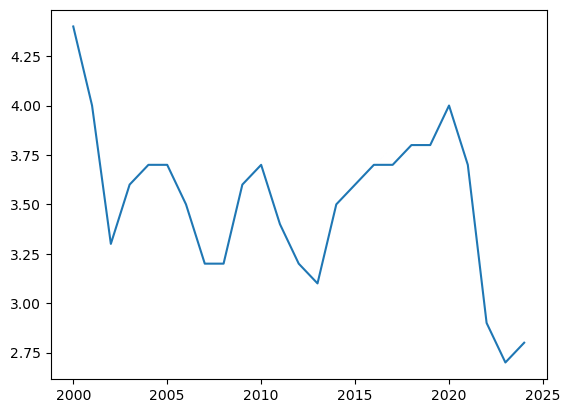

In [11]:
unemp.plot()

We can also make a bar plot.

<Axes: >

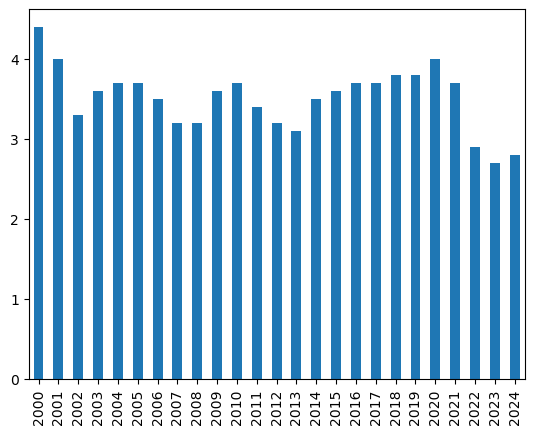

In [10]:
unemp.plot(kind='bar')

Though it doesn't make sense in this dataset, we may want to find the unique values in a `Series`, which can be done with the `.unique()` method.

In [12]:
unemp.unique()

array([4.4, 4. , 3.3, 3.6, 3.7, 3.5, 3.2, 3.4, 3.1, 3.8, 2.9, 2.7, 2.8])

Sometimes, we might want to select particular elements from a `Series`, which we call it *indexing*. We can do this using `.loc[idx]` where `idx` is an item from the index, or a list of items in the index. We will see this more in-depth in a coming section, but for now, we demonstrate how to select one or multiple elements of the Series.

In [6]:
unemp.loc[2010]

3.7

In [7]:
unemp.loc[[2005, 2010, 2015]]

2005    3.7
2010    3.7
2015    3.6
Name: unemployment, dtype: float64

We can also select the lowest and highest unemployment shown in the Series.

In [ ]:
unemp.loc[unemp.argmax()]

4.4

## Cleaning Data

For many data projects, a significant proportion of time is spent collecting and cleaning the data &mdash; not performing analysis. This non-analysis work is often called **data cleaning**. Pandas provides very powerful data cleaning tools, which we demonstrate using the following dataset.

In [14]:
df = pd.DataFrame({"numbers": ["#23", "#24", "#18", "#14", "#12", "#10", "#35"],
                   "nums": ["23", "24", "18", "14", np.nan, "XYZ", "35"],
                   "colors": ["green", "red", "yellow", "orange", "purple", "blue", "pink"],
                   "other_column": [0, 1, 0, 2, 1, 0, 2]})

In [15]:
df

,numbers,nums,colors,other_column
0,#23,23,green,0
1,#24,24,red,1
2,#18,18,yellow,0
3,#14,14,orange,2
4,#12,NaN,purple,1
5,#10,XYZ,blue,0
6,#35,35,pink,2


What would happen if we wanted to try and compute the mean of `numbers`?

In [7]:
df.numbers.mean()

TypeError: Could not convert string '#23#24#18#14#12#10#35' to numeric

It throws an error! Can you guess why? The final error message says `TypeError: Could not convert string '#23#24#18#14#12#10#35' to numeric`. The problem is that we cannot convert a value like `'#39'` into numeric data types, e.g., `int` or `float`. Recall the string methods. The solution to this kind of problem was to remove the `#` by using the `replace()` string method:

In [16]:
# Example: Changing a string into a numeric data.
prob = '#39'
print(int(prob.replace('#', '')))

39


In case of `DataFrame`, one solution to make this change to every element of a column would be to loop through all elements of the column and apply the desired string methods. (Is it efficient?)

In [17]:
%%time

# Solution 1: Iterate over all rows.
for row in df.iterrows():
    # `iterrows` method produces a tuple with two elements:
    # (1) index, (2) a Series with the data from that row.
    idx, values = row

    # Apply string method.
    clean_number = int(values['numbers'].replace('#', ''))

    # `at` method is very similar to the `loc` method, but it is specialized for accessing single elements at a time.
    # We use it here to give the loop the best chance to beat a faster method which we show next.
    df.at[idx, 'numbers_loop'] = clean_number

CPU times: user 893 μs, sys: 26 μs, total: 919 μs
Wall time: 903 μs


While this is fast for a small dataset like this, this method is slow for larger datasets. One significantly faster (and easier) method is to apply a string method to an entire column of data. Most methods that are available to a Python string are also available to a Pandas Series that has `dtype` object. We access them by doing `s.str.method_name()` where `method_name` is the name of the method. When we apply the method to a Series, it is applied to all rows in the Series in one shot!

Let's redo our previous example using a pandas `.str` method.

In [18]:
%%time
df['numbers_str'] = df['numbers'].str.replace('#', '').astype(int)

CPU times: user 519 μs, sys: 82 μs, total: 601 μs
Wall time: 644 μs


Here it is about 1.5 times faster than loop. However, speed gain increases with size of DataFrame. The speedup can be in the ballpark of 100 to 500 times faster for big DataFrames.

We can use `.str` to access almost any string method that works on normal strings.